## Choose the optimal number of topics

----------Edited on Oct.30, 2019---------------

Original website: https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [31]:
with open('C:\\Users\\mskim4\\Downloads\\paperlist.txt','r',encoding='utf-8') as f1:
    texts_paper = f1.readlines()
with open('C:\\Users\\mskim4\\Downloads\\patentlist.txt','r',encoding='utf-8') as f2:
    texts_patent = f2.readlines()
with open('C:\\Users\\mskim4\\Downloads\\projectlist.txt','r',encoding='utf-8') as f3:
    texts_project = f3.readlines()    

In [26]:
import ast

tr = [inner for item in texts_paper for inner in ast.literal_eval(item)] 

In [14]:
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis.gensim
import numpy
from gensim.matutils import hellinger

In [27]:
dictionary = corpora.Dictionary(tr)
corpus = [dictionary.doc2bow(text) for text in tr]


In [28]:
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

In [29]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tr, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37845971987720517


In [30]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=tr, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -9.486382631273846


In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

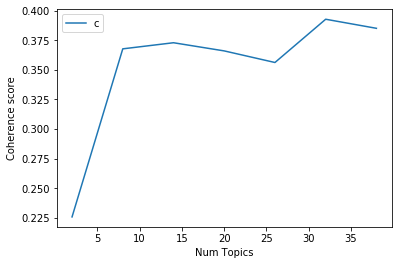

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tr, start=2, limit=40, step=6)

# Show graph

%matplotlib inline
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()